In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv


#### Define your own business case for building a linear regression model. Define your Y  and choose appropriate independent variables . Remember there should be a sound business reason to do this .Define the use context for such a model clearly. Present the model and quantify the benefits of the model.

1. `import numpy as np`: Imports the NumPy library, which is used for numerical computations in Python. It's often imported with the alias `np` for brevity.

2. `import pandas as pd`: Imports the Pandas library, which is used for data manipulation and analysis. It's often imported with the alias `pd` for brevity.

3. `import seaborn as sns`: Imports the Seaborn library, which is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics.

4. `import matplotlib.pyplot as plt`: Imports the Pyplot module from the Matplotlib library, which provides a MATLAB-like interface for creating plots and visualizations.

5. `from matplotlib import rcParams`: Imports the `rcParams` module from Matplotlib, which allows customization of Matplotlib's default settings.

6. `from scipy import stats`: Imports the stats module from the SciPy library, which provides numerous statistical functions and tools for scientific computing.

7. `import warnings`: Imports the warnings module, which provides a way to control warning messages in Python.

8. `sns.set_style('darkgrid')`: Sets the default aesthetic style for Seaborn plots to 'darkgrid', which includes a gray background with grid lines.

9. `warnings.filterwarnings('ignore')`: Suppresses all warnings that might be generated during the execution of the code. This is generally not recommended in production code but can be useful for reducing clutter during exploratory data analysis or scripting.



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import warnings

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

## **Reading The Dataset:**

In this Python code, a CSV file named 'accepted_2007_to_2018Q4.csv.gz' is being read into a Pandas DataFrame `acc_data`, and the first few rows of the DataFrame are displayed.

1. `pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz', sep=',', low_memory=False)`: This line uses the `read_csv` function from the Pandas library (`pd`) to read the CSV file 'accepted_2007_to_2018Q4.csv.gz' into a DataFrame named `acc_data`. 
   - `'/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz'` specifies the file path of the CSV file to be read.
   - `sep=','` specifies that comma is the delimiter used in the CSV file.
   - `low_memory=False` is used to ensure that Pandas does not attempt to infer the data types for each column automatically, which can lead to memory errors for large datasets.

2. `acc_data.head()`: This line displays the first few rows of the DataFrame `acc_data` using the `head()` method. By default, `head()` displays the first 5 rows of the DataFrame.

After execution, the output will show the first few rows of the DataFrame `acc_data`, allowing for a quick inspection of the dataset's structure and content.


In [3]:
acc_data= pd.read_csv('/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz', sep=',', low_memory=False)
acc_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## **Exploratory Data Analysis:**

In this Python code, the maximum number of columns to display in Pandas output is being set to 200, and then descriptive statistics for numerical columns of the DataFrame `acc_data` are being calculated and displayed.

1. `pd.options.display.max_columns = 200`: This line sets the maximum number of columns to display in Pandas output to 200. This ensures that when the DataFrame is displayed, all columns are visible without truncation.

2. `acc_data.describe()`: This line calculates and displays descriptive statistics for numerical columns of the DataFrame `acc_data`. The `describe()` method computes statistics such as count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum for each numerical column in the DataFrame.

After execution, the output will display the descriptive statistics for numerical columns of the DataFrame `acc_data`, providing insights into the central tendency, dispersion, and distribution of the data.


In [4]:
pd.options.display.max_columns = 200
acc_data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.350744e+06,1.394539e+06,1.191818e+06,1.394539e+06,1.394539e+06,1.394539e+06,1.394320e+06,2.190392e+06,1.394539e+06,1.394538e+06,1.394538e+06,2.210638e+06,2.190322e+06,2.185733e+06,2.184597e+06,2.260523e+06,2.260639e+06,2.121597e+06,2.190391e+06,2.190391e+06,2.190392e+06,2.210638e+06,2.187256e+06,519701.000000,1.965233e+06,740359.000000,2.190392e+06,2.190392e+06,2.190392e+06,2.202078e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,2.779407e+00,6.764314e-01,1.562752e+00,2.122236e+01,3.550665e+04,6.914098e+01,1.290133e+00,2.749923e+00,5.806393e+03,5.703230e+01,3.457394e+04,1.012867e+00,1.47

In this Python code, the dimensions of the DataFrame `acc_data` are being retrieved.

1. `acc_data.shape`: This line retrieves the dimensions of the DataFrame `acc_data`. The `shape` attribute of a DataFrame returns a tuple representing the number of rows and columns in the DataFrame.

After execution, the output will display a tuple containing the number of rows and columns in the DataFrame `acc_data`, providing information about its size.


In [5]:
acc_data.shape

(2260701, 151)

1. `print(f"Dataset Shape: {acc_data.shape}")`: Prints the shape of the dataset (number of rows and columns).

2. `summary = pd.DataFrame(acc_data.dtypes,columns=['dtypes'])`: Creates a DataFrame `summary` with a column 'dtypes' containing data types of each column in `acc_data`.

3. `summary = summary.reset_index()`: Resets the index of the `summary` DataFrame.

4. `summary['Name'] = summary['index']`: Creates a new column 'Name' in `summary` and assigns values from the 'index' column to it.

5. `summary = summary[['Name','dtypes']]`: Reorders columns in `summary` to have 'Name' first and 'dtypes' second.

6. `summary['Missing'] = acc_data.isnull().sum().values`: Calculates number of missing values for each column in `acc_data` and adds it as 'Missing' column in `summary`.

7. `summary['Uniques'] = acc_data.nunique().values`: Calculates number of unique values for each column in `acc_data` and adds it as 'Uniques' column in `summary`.

8. `summary['First Value'] = acc_data.loc[0].values`, `summary['Second Value'] = acc_data.loc[1].values`, `summary['Third Value'] = acc_data.loc[2].values`: Extracts first, second, and third values of each column in `acc_data` and adds them as 'First Value', 'Second Value', 'Third Value' columns in `summary`.

9. `for name in summary['Name'].value_counts().index:`: Iterates over unique column names in `summary`.

10. `summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(acc_data[name].value_counts(normalize=True), base=2),2)`: Calculates entropy of values in each column of `acc_data` and adds it as 'Entropy' column in `summary`.

11. `return summary`: Returns the `summary` DataFrame containing all computed summary statistics for the input dataset `acc_data`.


In [6]:
def resumetable(acc_data):
    print(f"Dataset Shape: {acc_data.shape}")
    summary = pd.DataFrame(acc_data.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = acc_data.isnull().sum().values    
    summary['Uniques'] = acc_data.nunique().values
    summary['First Value'] = acc_data.loc[0].values
    summary['Second Value'] = acc_data.loc[1].values
    summary['Third Value'] = acc_data.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(acc_data[name].value_counts(normalize=True), base=2),2) 

    return summary

In this Python code, a function named `resumetable` is being called with a sliced portion of the DataFrame `acc_data` containing the first 100,000 rows as an argument. The resulting output is further sliced to display only the first 60 rows.

1. `acc_data[:100000]`: This part of the code slices the DataFrame `acc_data` to select the first 100,000 rows. This sliced DataFrame is then passed as an argument to the function `resumetable`.

2. `resumetable(...)`: This part of the code calls the function `resumetable` with the sliced DataFrame as an argument. The function likely summarizes the key statistics or characteristics of the DataFrame, providing a concise summary table.

3. `[:60]`: This part of the code further slices the resulting output to display only the first 60 rows of the summary table.

After execution, the output will display a summary table of the DataFrame `acc_data` containing key statistics or characteristics, limited to the first 60 rows.


In [7]:
resumetable(acc_data[:100000])[:60]

Dataset Shape: (100000, 151)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,object,0,100000,68407277,68355089,68341763,16.61
1,member_id,float64,100000,0,NaN,NaN,NaN,0.00
2,loan_amnt,float64,0,1350,3600.0,24700.0,20000.0,6.79
3,funded_amnt,float64,0,1350,3600.0,24700.0,20000.0,6.79
4,funded_amnt_inv,float64,0,1354,3600.0,24700.0,20000.0,7.12
5,term,object,0,2,36 months,36 months,60 months,0.90
6,int_rate,float64,0,81,13.99,11.99,10.78,5.47
7,installment,float64,0,18075,123.03,820.28,432.66,12.03
8,grade,object,0,7,C,C,B,2.27
9,sub_grade,object,0,35,C4,C1,B4,4.57


In this Python code, a function named `resumetable` is being called with a sliced portion of the DataFrame `acc_data` containing the first 100,000 rows as an argument. The resulting output is further sliced to display rows 60 through 111.

1. `acc_data[:100000]`: This part of the code slices the DataFrame `acc_data` to select the first 100,000 rows. This sliced DataFrame is then passed as an argument to the function `resumetable`.

2. `resumetable(...)`: This part of the code calls the function `resumetable` with the sliced DataFrame as an argument. The function likely summarizes the key statistics or characteristics of the DataFrame, providing a concise summary table.

3. `[60:112]`: This part of the code further slices the resulting output to display rows 60 through 111 of the summary table. The index values in Python are zero-based, so `[60:112]` represents the range from the 61st row (index 60) to the 112nd row (index 111).

After execution, the output will display a portion of the summary table of the DataFrame `acc_data`, containing key statistics or characteristics for the specified range of rows.


In [8]:
resumetable(acc_data[:100000])[60:112]

Dataset Shape: (100000, 151)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
60,acc_now_delinq,float64,0,5,0.0,0.0,0.0,0.05
61,tot_coll_amt,float64,0,4010,722.0,0.0,0.0,2.40
62,tot_cur_bal,float64,0,82713,144904.0,204396.0,189699.0,16.24
63,open_acc_6m,float64,78628,13,2.0,1.0,0.0,2.06
64,open_act_il,float64,78628,35,2.0,1.0,1.0,3.05
65,open_il_12m,float64,78628,12,0.0,0.0,0.0,1.71
66,open_il_24m,float64,78628,17,1.0,1.0,4.0,2.47
67,mths_since_rcnt_il,float64,79190,201,21.0,19.0,19.0,5.67
68,total_bal_il,float64,78628,17030,4981.0,18005.0,10827.0,13.00
69,il_util,float64,81383,160,36.0,73.0,73.0,6.45


In this Python code, a function named `resumetable` is being called with a sliced portion of the DataFrame `acc_data` containing the first 100,000 rows as an argument. The resulting output is further sliced to display rows starting from index 112 onwards.

1. `acc_data[:100000]`: This part of the code slices the DataFrame `acc_data` to select the first 100,000 rows. This sliced DataFrame is then passed as an argument to the function `resumetable`.

2. `resumetable(...)`: This part of the code calls the function `resumetable` with the sliced DataFrame as an argument. The function likely summarizes the key statistics or characteristics of the DataFrame, providing a concise summary table.

3. `[112:]`: This part of the code further slices the resulting output to display rows starting from index 112 onwards. The colon (`:`) indicates that all rows from index 112 to the end of the summary table will be included.

After execution, the output will display a portion of the summary table of the DataFrame `acc_data`, containing key statistics or characteristics starting from the 113th row onwards.


In [9]:
resumetable(acc_data[:100000])[112:]

Dataset Shape: (100000, 151)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
112,total_bal_ex_mort,float64,0,65554,7746.0,39475.0,18696.0,15.82
113,total_bc_limit,float64,0,2759,2400.0,79300.0,6200.0,9.27
114,total_il_high_credit_limit,float64,0,55965,13734.0,24667.0,14877.0,14.05
115,revol_bal_joint,float64,100000,0,NaN,NaN,NaN,0.00
116,sec_app_fico_range_low,float64,100000,0,NaN,NaN,NaN,0.00
117,sec_app_fico_range_high,float64,100000,0,NaN,NaN,NaN,0.00
118,sec_app_earliest_cr_line,object,100000,0,NaN,NaN,NaN,0.00
119,sec_app_inq_last_6mths,float64,100000,0,NaN,NaN,NaN,0.00
120,sec_app_mort_acc,float64,100000,0,NaN,NaN,NaN,0.00
121,sec_app_open_acc,float64,100000,0,NaN,NaN,NaN,0.00


#### Dropping columns having null values

In [10]:
acc_data.drop(columns=['member_id','emp_title','desc','mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','annual_inc_joint','dti_joint','total_bal_il',
'total_bal_il','max_bal_bc','bc_open_to_buy','revol_bal_joint','sec_app_fico_range_low','sec_app_fico_range_high','sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc',
'sec_app_open_acc','sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','sec_app_mths_since_last_major_derog',
'hardship_type','deferral_term','hardship_length'], inplace=True)

In [11]:
acc_data.drop(columns=['id'], inplace=True)

In this Python code, the dimensions of the DataFrame `acc_data` are being retrieved after dropping certain columns.

1. `acc_data.shape`: This line retrieves the dimensions of the DataFrame `acc_data` after certain columns have been dropped. The `shape` attribute of a DataFrame returns a tuple representing the number of rows and columns in the DataFrame.

After execution, the output will display a tuple containing the updated number of rows and columns in the DataFrame `acc_data`, providing information about its size after the specified columns have been dropped.


In [12]:
acc_data.shape

(2260701, 123)

In this Python code, the number of missing values (NaN) in each column of the DataFrame `acc_data` is being calculated.

1. `acc_data.isnull()`: This part of the code generates a boolean mask DataFrame where `True` indicates the presence of a missing value (NaN) and `False` indicates the absence of a missing value.

2. `.sum()`: This method is then called on the boolean mask DataFrame to sum the number of `True` values (i.e., missing values) in each column.

After execution, the output will display the count of missing values in each column of the DataFrame `acc_data`, providing insights into the completeness of the dataset after dropping certain columns.


In [13]:
acc_data.isnull().sum()

loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
term                          33
int_rate                      33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 123, dtype: int64

In this Python code, the proportion of missing values in each column of the DataFrame `acc_data` is being calculated.

1. `acc_data.isnull()`: This part of the code generates a boolean mask DataFrame where `True` indicates the presence of a missing value (NaN) and `False` indicates the absence of a missing value.

2. `.mean()`: This method is then called on the boolean mask DataFrame to calculate the mean along the columns. Since `True` values are treated as 1 and `False` values as 0, taking the mean gives the proportion of missing values in each column.

After execution, the output will display the proportion of missing values in each column of the DataFrame `acc_data`, providing insights into the completeness of the dataset after dropping certain columns.


In [14]:
acc_data.isnull().mean()

loan_amnt                0.000015
funded_amnt              0.000015
funded_amnt_inv          0.000015
term                     0.000015
int_rate                 0.000015
                           ...   
settlement_status        0.984852
settlement_date          0.984852
settlement_amount        0.984852
settlement_percentage    0.984852
settlement_term          0.984852
Length: 123, dtype: float64

In [15]:
acc_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,il_util,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,hardship_reason,hardship_status,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,1.0,Individual,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,36.0,3.0,3.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,1.0,Individual,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,73.0,2.0,3.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,NaN,Mar-2019,704.0,700.0,0.0,1.0,Joint App,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,73.0,0.0,2.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,NaN,10.0,NaN,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,NaN,NaN,NaN,NaN,Na

#### Dropping columns containing either 40% or more than 40% NaN values 

In this Python code, a modified DataFrame `mod_acc_data` is being created by dropping columns with a high proportion of missing values.

1. `perc = 40.0`: This line sets the threshold percentage of missing values (`perc`) to 40.0%.

2. `min_count = int(((100-perc)/100)*acc_data.shape[0] + 1)`: This line calculates the minimum count of non-missing values required for each column to be retained in the DataFrame. It is computed as the number of rows multiplied by the complement of the threshold percentage, plus 1.

3. `mod_acc_data = acc_data.dropna(axis=1, thresh=min_count)`: This line drops columns from the DataFrame `acc_data` where the count of non-missing values is less than `min_count`. The `axis=1` parameter specifies that columns are to be dropped, and the `thresh` parameter specifies the minimum count of non-missing values required to retain the column.

4. `print("Modified Dataframe : ")`: This line prints a message indicating the modified DataFrame.

5. `print(mod_acc_data)`: This line prints the modified DataFrame `mod_acc_data`.

After execution, the output will display the modified DataFrame `mod_acc_data`, where columns with a proportion of missing values greater than 40% have been dropped.


In [16]:
perc = 40.0
min_count =  int(((100-perc)/100)*acc_data.shape[0] + 1)
mod_acc_data = acc_data.dropna( axis=1, 
                thresh=min_count)
print("Modified Dataframe : ")
print(mod_acc_data)

Modified Dataframe : 
         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           3600.0       3600.0           3600.0   36 months     13.99   
1          24700.0      24700.0          24700.0   36 months     11.99   
2          20000.0      20000.0          20000.0   60 months     10.78   
3          35000.0      35000.0          35000.0   60 months     14.85   
4          10400.0      10400.0          10400.0   60 months     22.45   
...            ...          ...              ...         ...       ...   
2260696    40000.0      40000.0          40000.0   60 months     10.49   
2260697    24000.0      24000.0          24000.0   60 months     14.49   
2260698    14000.0      14000.0          14000.0   60 months     14.49   
2260699        NaN          NaN              NaN         NaN       NaN   
2260700        NaN          NaN              NaN         NaN       NaN   

         installment grade sub_grade emp_length home_ownership  annual_inc  \
0          

In [17]:
mod_acc_data.isnull().mean()

loan_amnt                     0.000015
funded_amnt                   0.000015
funded_amnt_inv               0.000015
term                          0.000015
int_rate                      0.000015
                                ...   
total_bc_limit                0.022145
total_il_high_credit_limit    0.031101
hardship_flag                 0.000015
disbursement_method           0.000015
debt_settlement_flag          0.000015
Length: 100, dtype: float64

In [18]:
mod_acc_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,3.0,3.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,2.0,3.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,0.0,2.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,1.0,1.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,104433

## **Business Model:**
#### Building a model to predict the loan amount that can be borrowed depending on the term, interest rate, installment, employment length, home ownership, annual income, purpose, application type, and FICO range (low and high).

In this Python code, the column names of a DataFrame `mod_acc_data` are being extracted and printed.

1. `mod_acc_data.columns.values.tolist()`: This part of the code retrieves the column names of the DataFrame `mod_acc_data`. The `columns` attribute of a DataFrame returns an Index object containing the column names. The `values` attribute converts this Index object into a NumPy array, and the `tolist()` method then converts this array into a Python list.

2. `column = ...`: This line assigns the list of column names obtained in the previous step to the variable `column`.

3. `print(column)`: This line prints the list of column names stored in the variable `column`.

After execution, the output will display the column names of the DataFrame `mod_acc_data`, providing information about the structure of the dataset.


In [19]:
column = (mod_acc_data.columns.values.tolist())
print(column)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_o

#### After checking the definition of all the columns, some are being dropped as those are not related to the business model.

In [20]:
df = mod_acc_data[['loan_amnt', 'term', 'int_rate', 'installment', 'application_type', 'emp_length', 'home_ownership', 'annual_inc', 'purpose', 'fico_range_low', 'fico_range_high']]
df.head()

,loan_amnt,term,int_rate,installment,application_type,emp_length,home_ownership,annual_inc,purpose,fico_range_low,fico_range_high
0,3600.0,36 months,13.99,123.03,Individual,10+ years,MORTGAGE,55000.0,debt_consolidation,675.0,679.0
1,24700.0,36 months,11.99,820.28,Individual,10+ years,MORTGAGE,65000.0,small_business,715.0,719.0
2,20000.0,60 months,10.78,432.66,Joint App,10+ years,MORTGAGE,63000.0,home_improvement,695.0,699.0
3,35000.0,60 months,14.85,829.90,Individual,10+ years,MORTGAGE,110000.0,debt_consolidation,785.0,789.0
4,10400.0,60 months,22.45,289.91,Individual,3 years,MORTGAGE,104433.0,major_purchase,695.0,699.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   loan_amnt         float64
 1   term              object 
 2   int_rate          float64
 3   installment       float64
 4   application_type  object 
 5   emp_length        object 
 6   home_ownership    object 
 7   annual_inc        float64
 8   purpose           object 
 9   fico_range_low    float64
 10  fico_range_high   float64
dtypes: float64(6), object(5)
memory usage: 189.7+ MB


In this Python code, the number of missing values (NaN) in each column of the DataFrame `df` is being calculated.

1. `df.isnull()`: This part of the code generates a boolean mask DataFrame where `True` indicates the presence of a missing value (NaN) and `False` indicates the absence of a missing value.

2. `.sum()`: This method is then called on the boolean mask DataFrame to sum the number of `True` values (i.e., missing values) in each column.

After execution, the output will display the count of missing values in each column of the DataFrame `df`, providing insights into the completeness of the dataset.


In [22]:
df.isnull().sum()

loan_amnt               33
term                    33
int_rate                33
installment             33
application_type        33
emp_length          146940
home_ownership          33
annual_inc              37
purpose                 33
fico_range_low          33
fico_range_high         33
dtype: int64

In this Python code, the proportion of missing values in each column of the DataFrame `df` is being calculated.

1. `df.isnull()`: This part of the code generates a boolean mask DataFrame where `True` indicates the presence of a missing value and `False` indicates the absence of a missing value.

2. `.mean()`: This method is then called on the boolean mask DataFrame to calculate the mean along the columns. Since `True` values are treated as 1 and `False` values as 0, taking the mean gives the proportion of missing values in each column.

After execution, the output will display the proportion of missing values in each column of the DataFrame `df`, providing insights into the completeness of the dataset.


In [23]:
df.isnull().mean()

loan_amnt           0.000015
term                0.000015
int_rate            0.000015
installment         0.000015
application_type    0.000015
emp_length          0.064998
home_ownership      0.000015
annual_inc          0.000016
purpose             0.000015
fico_range_low      0.000015
fico_range_high     0.000015
dtype: float64

## **Data Preprocessing:**

#### The columns have been divided into numerical and categorical for future analysis.

In [24]:
num_cols= ['loan_amnt' ,'int_rate', 'installment', 'annual_inc', 'fico_range_low', 'fico_range_high']
cat_cols= df.drop(['loan_amnt' ,'int_rate', 'installment', 'annual_inc', 'fico_range_low', 'fico_range_high'], axis=1).columns

In [25]:
cat_cols

Index(['term', 'application_type', 'emp_length', 'home_ownership', 'purpose'], dtype='object')

In this Python code, the number of occurrences of each unique value in the 'term' column of the DataFrame `df` is being counted.

1. `pd.value_counts(df.term)`: This line uses the `value_counts` function from the Pandas library (`pd`) to count the occurrences of each unique value in the 'term' column of the DataFrame `df`. This function returns a Series where the index contains the unique values in the 'term' column, and the values contain the corresponding counts of occurrences.

After execution, the output will display the count of occurrences of each unique value in the 'term' column, providing insights into the distribution of loan terms in the dataset.


In [26]:
pd.value_counts(df.term)

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

In this Python code, the number of occurrences of each unique value in the 'application_type' column of the DataFrame `df` is being counted.

1. `pd.value_counts(df.application_type)`: This line uses the `value_counts` function from the Pandas library (`pd`) to count the occurrences of each unique value in the 'application_type' column of the DataFrame `df`. This function returns a Series where the index contains the unique values in the 'application_type' column, and the values contain the corresponding counts of occurrences.

After execution, the output will display the count of occurrences of each unique value in the 'application_type' column, providing insights into the distribution of application types in the dataset.


In [27]:
pd.value_counts(df.application_type)

Individual    2139958
Joint App      120710
Name: application_type, dtype: int64

In this Python code, the number of occurrences of each unique value in the 'emp_length' column of the DataFrame `df` is being counted.

1. `pd.value_counts(df.emp_length)`: This line uses the `value_counts` function from the Pandas library (`pd`) to count the occurrences of each unique value in the 'emp_length' column of the DataFrame `df`. This function returns a Series where the index contains the unique values in the 'emp_length' column, and the values contain the corresponding counts of occurrences.

After execution, the output will display the count of occurrences of each unique value in the 'emp_length' column, providing insights into the distribution of employment lengths in the dataset.


In [28]:
pd.value_counts(df.emp_length)

10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: emp_length, dtype: int64

In this Python code, the number of occurrences of each unique value in the 'home_ownership' column of the DataFrame `df` is being counted.

1. `pd.value_counts(df.home_ownership)`: This line uses the `value_counts` function from the Pandas library (`pd`) to count the occurrences of each unique value in the 'home_ownership' column of the DataFrame `df`. This function returns a Series where the index contains the unique values in the 'home_ownership' column, and the values contain the corresponding counts of occurrences.

After execution, the output will display the count of occurrences of each unique value in the 'home_ownership' column, providing insights into the distribution of home ownership statuses in the dataset.


In [29]:
pd.value_counts(df.home_ownership)

MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: home_ownership, dtype: int64

In this Python code, the number of occurrences of each unique value in the 'purpose' column of the DataFrame `df` is being counted.

1. `pd.value_counts(df.purpose)`: This line uses the `value_counts` function from the Pandas library (`pd`) to count the occurrences of each unique value in the 'purpose' column of the DataFrame `df`. This function returns a Series where the index contains the unique values in the 'purpose' column, and the values contain the corresponding counts of occurrences.

After execution, the output will display the count of occurrences of each unique value in the 'purpose' column, providing insights into the distribution of purposes in the dataset.


In [30]:
pd.value_counts(df.purpose)

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

### Encoding Categorical Variables

In this Python code, categorical variables in a DataFrame `df` are being encoded using the LabelEncoder from scikit-learn.

1. `from sklearn.preprocessing import LabelEncoder`: This line imports the LabelEncoder class from the preprocessing module of scikit-learn. The LabelEncoder is used to encode categorical variables into numerical labels.

2. `le = LabelEncoder()`: This line creates an instance of the LabelEncoder class, which will be used to encode categorical variables.

3. `for col in cat_cols:`: This line starts a loop iterating over each column name in the list `cat_cols`, assuming `cat_cols` contains the names of categorical columns in the DataFrame `df`.

4. `df[col] = le.fit_transform(df[col].astype(str))`: Within the loop, each categorical column `col` is selected from the DataFrame `df`, converted to string type (to handle potential non-string categorical values), and then encoded using the `fit_transform` method of the LabelEncoder object `le`. The original categorical column in `df` is replaced with its encoded numerical labels.

5. `df.head()`: This line displays the first few rows of the DataFrame `df` after encoding the categorical variables. It allows for a quick visual inspection of the changes made to the DataFrame.

After execution, the categorical variables in the DataFrame `df` will be encoded with numerical labels.


In [31]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    
df.head()

,loan_amnt,term,int_rate,installment,application_type,emp_length,home_ownership,annual_inc,purpose,fico_range_low,fico_range_high
0,3600.0,0,13.99,123.03,0,1,1,55000.0,2,675.0,679.0
1,24700.0,0,11.99,820.28,0,1,1,65000.0,12,715.0,719.0
2,20000.0,1,10.78,432.66,1,1,1,63000.0,4,695.0,699.0
3,35000.0,1,14.85,829.90,0,1,1,110000.0,2,785.0,789.0
4,10400.0,1,22.45,289.91,0,3,1,104433.0,6,695.0,699.0


### Dealing with Missing Values

In this Python code, missing values in a DataFrame `df` are being imputed using the IterativeImputer from scikit-learn.

1. `from sklearn.experimental import enable_iterative_imputer`: This line enables the IterativeImputer class, which is an experimental feature in scikit-learn.

2. `from sklearn.impute import IterativeImputer`: This line imports the IterativeImputer class from the impute module of scikit-learn. This class imputes missing values by modeling each feature with missing values as a function of other features and iteratively completing one feature at a time.

3. `from sklearn.linear_model import LinearRegression`: This line imports the LinearRegression class from the linear_model module of scikit-learn. This class is used as the estimator for imputing missing values in IterativeImputer.

4. `lr = LinearRegression()`: This line creates an instance of the LinearRegression class, which will be used as the estimator in the IterativeImputer for imputing missing values.

5. `imputer = IterativeImputer(random_state=42, estimator=lr, max_iter=10, n_nearest_features=2, imputation_order='roman')`: This line creates an instance of the IterativeImputer class with specified parameters. 
   - `random_state=42`: Sets the random seed for reproducibility.
   - `estimator=lr`: Sets the estimator to use for imputing missing values, which is the LinearRegression model created earlier.
   - `max_iter=10`: Sets the maximum number of iterations for imputation.
   - `n_nearest_features=2`: Specifies the number of nearest features to use for imputation.
   - `imputation_order='roman'`: Specifies the imputation order, which could be 'ascending', 'descending', or 'roman'.

6. `df_final = imputer.fit_transform(df)`: This line applies the IterativeImputer to impute missing values in the DataFrame `df` and stores the imputed values in `df_final`.

7. `df_final = pd.DataFrame(df_final, columns=df.columns)`: This line converts the imputed numpy array `df_final` back to a DataFrame with the same column names as the original DataFrame `df`.

After execution, `df_final` will contain the original data with missing values imputed using the IterativeImputer.


In [32]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

imputer = IterativeImputer(random_state=42, estimator=lr, max_iter=10, n_nearest_features=2, imputation_order = 'roman')
df_final = imputer.fit_transform(df)

df_final = pd.DataFrame(df_final, columns = df.columns)

In this Python code, the number of missing values (NaN) in each column of the DataFrame `df_final` is being calculated.

1. `df_final.isnull()`: This part of the code generates a boolean mask DataFrame where `True` indicates the presence of a missing value (NaN) and `False` indicates the absence of a missing value.

2. `.sum()`: This method is then called on the boolean mask DataFrame to sum the number of `True` values (i.e., missing values) in each column.

After execution, the output will display the count of missing values in each column of the DataFrame `df_final`, providing insights into the completeness of the dataset.


In [33]:
df_final.isnull().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
application_type    0
emp_length          0
home_ownership      0
annual_inc          0
purpose             0
fico_range_low      0
fico_range_high     0
dtype: int64

In this Python code, a random sample of 5 rows from the DataFrame `df_final` is being selected and displayed.

1. `df_final.sample(5)`: This line uses the `sample` method of the DataFrame `df_final` to randomly select 5 rows from the DataFrame. By default, the `sample` method selects rows randomly without replacement. Each time this line is executed, it may return a different set of 5 rows.

After execution, the output will display a subset of 5 randomly selected rows from the DataFrame `df_final`, providing a glimpse of the data's structure and content.


In [34]:
df_final.sample(5)

,loan_amnt,term,int_rate,installment,application_type,emp_length,home_ownership,annual_inc,purpose,fico_range_low,fico_range_high
1276046,25000.0,0.0,10.99,818.35,0.0,2.0,1.0,88900.0,2.0,665.0,669.0
1821421,35000.0,1.0,22.70,980.65,0.0,8.0,1.0,117000.0,2.0,690.0,694.0
1497544,1700.0,0.0,6.83,52.36,0.0,1.0,5.0,50000.0,10.0,735.0,739.0
2195685,9600.0,0.0,7.24,297.48,0.0,3.0,5.0,80000.0,0.0,725.0,729.0
690103,9600.0,0.0,19.99,356.73,0.0,5.0,1.0,77000.0,4.0,665.0,669.0


### Correlation Matrix

In this Python code, a heatmap visualization of the correlation matrix of the DataFrame `df_final` is being created using the `matplotlib` and `seaborn` libraries.

1. `plt.figure(figsize=(10,8))`: This line creates a new figure for the heatmap visualization with a specified size of 10 inches in width and 8 inches in height. This adjusts the dimensions of the figure to make it more readable and visually appealing.

2. `sns.heatmap(df_final.corr(), annot=True, cmap="YlGnBu")`: This line generates the heatmap using the `heatmap` function from the `seaborn` library (`sns`). The argument `df_final.corr()` computes the correlation matrix of the DataFrame `df_final`. The `annot=True` parameter adds annotations (correlation values) to the heatmap cells. The `cmap="YlGnBu"` parameter sets the color map to Yellow-Green-Blue, which represents the range of correlation values from low to high.

After execution, a heatmap visualization of the correlation matrix of `df_final` will be displayed, with annotated correlation values indicating the strength and direction of the relationships between pairs of features.


<AxesSubplot:>

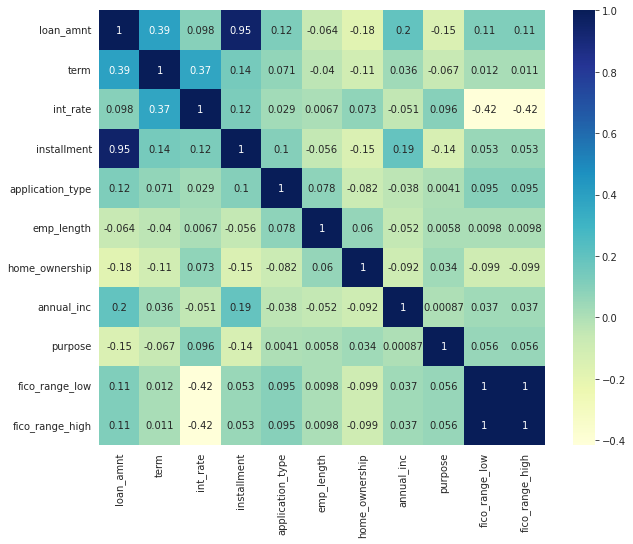

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df_final.corr(), annot=True, cmap="YlGnBu")

In this Python code, correlation analysis is being conducted on the features of a DataFrame using NumPy and Pandas.

1. `cor = df_final.corr()`: This line calculates the correlation matrix of the DataFrame `df_final`. The resulting DataFrame `cor` contains the pairwise correlation coefficients between all pairs of features in `df_final`.

2. `cor.loc[:,:] = np.tril(cor, k=-1)`: This line modifies the correlation matrix `cor` by setting all elements above the main diagonal to zero. This step ensures that only the lower triangle (excluding the diagonal) of the correlation matrix is retained. This is done to avoid redundancy and ensure that each pair of features is considered only once.

3. `cor = cor.stack()`: This line reshapes the lower triangle of the correlation matrix into a one-dimensional Series. The `stack()` function converts the lower triangle of the correlation matrix into a multi-level index Series where each row corresponds to a unique pair of features and its correlation coefficient.

4. `cor[(cor > 0.1) | (cor < -0.1)]`: This line filters the correlation coefficients to retain only those values greater than 0.1 or less than -0.1. This is achieved using boolean indexing. The resulting Series contains only the correlation coefficients that meet the specified condition.

After execution, the resulting Series will contain correlation coefficients that are greater than 0.1 or less than -0.1, indicating moderate to strong linear relationships between pairs of features in the DataFrame.


In [36]:
cor = df_final.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.1) | (cor < -0.1)]

term              loan_amnt         0.393766
int_rate          term              0.372626
installment       loan_amnt         0.945625
                  term              0.139222
                  int_rate          0.123951
application_type  loan_amnt         0.118437
                  installment       0.102258
home_ownership    loan_amnt        -0.179576
                  term             -0.108580
                  installment      -0.145435
annual_inc        loan_amnt         0.197246
                  installment       0.190270
purpose           loan_amnt        -0.150363
                  installment      -0.135561
fico_range_low    loan_amnt         0.110585
                  int_rate         -0.415989
fico_range_high   loan_amnt         0.110584
                  int_rate         -0.415997
                  fico_range_low    0.999997
dtype: float64

Correlation measures the strength and direction of a linear relationship between two variables. In the context of the provided correlation coefficients:

- A positive correlation coefficient (between 0 and 1) indicates a direct relationship, meaning that as one variable increases, the other variable tends to increase as well.
- A negative correlation coefficient (between -1 and 0) indicates an inverse relationship, meaning that as one variable increases, the other variable tends to decrease.

Now, let's interpret the provided correlations:

1. **term - loan_amnt (0.393766)**: There is a moderate positive correlation between the loan amount and the term of the loan. This suggests that loans with longer terms tend to have higher amounts.

2. **int_rate - term (0.372626)**: There is a moderate positive correlation between the interest rate and the term of the loan. This suggests that loans with longer terms tend to have higher interest rates.

3. **installment - loan_amnt (0.945625)**: There is a very strong positive correlation between the loan amount and the installment. This indicates that as the loan amount increases, the installment amount also increases significantly.

4. **home_ownership - loan_amnt (-0.179576)**: There is a weak negative correlation between home ownership and the loan amount. This suggests that individuals who own homes may tend to apply for smaller loan amounts.

5. **annual_inc - loan_amnt (0.197246)**: There is a weak positive correlation between annual income and the loan amount. This suggests that individuals with higher annual incomes may tend to apply for higher loan amounts.

6. **fico_range_low - int_rate (-0.415989)**: There is a moderate negative correlation between the FICO score range (low) and the interest rate. This suggests that borrowers with higher FICO scores tend to receive lower interest rates.

7. **fico_range_high - int_rate (-0.415997)**: There is a moderate negative correlation between the FICO score range (high) and the interest rate. This correlation is almost identical to the one with 'fico_range_low' because both variables are highly correlated (nearly perfectly positively correlated).

8. **fico_range_low - fico_range_high (0.999997)**: There is an extremely strong positive correlation between the FICO score range (low) and the FICO score range (high). This is expected, as both variables represent different measures of the same underlying FICO score. 

Overall, these correlation coefficients provide insights into how various features are related to each other within the dataset.

### Splitting The Data

In this Python code, the dataset is prepared for training a machine learning model using scikit-learn.

1. `from sklearn.preprocessing import StandardScaler`: This line imports the `StandardScaler` class from the `preprocessing` module of scikit-learn. The `StandardScaler` will be used to standardize numerical features.

2. `from sklearn.preprocessing import normalize`: This line imports the `normalize` function from the `preprocessing` module of scikit-learn. It's likely imported for a specific purpose, but it's not used in the subsequent code.

3. `from sklearn.model_selection import train_test_split`: This line imports the `train_test_split` function from the `model_selection` module of scikit-learn. This function is used to split the dataset into training and testing sets.

4. `X = df_final[['term', 'int_rate', 'installment', 'application_type', 'emp_length', 'home_ownership', 'annual_inc', 'purpose', 'fico_range_low', 'fico_range_high']]`: This line creates a DataFrame `X` containing the selected features from the original dataset `df_final`. These features are likely chosen as predictors for the model.

5. `y = df_final['loan_amnt']`: This line creates a Series `y` containing the target variable, which appears to be loan amounts from the original dataset `df_final`.

6. `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)`: This line splits the dataset into training and testing sets. The `train_test_split` function is called with four arguments: the feature DataFrame `X`, the target variable `y`, `test_size=0.2` indicating that 20% of the data will be used for testing, and `random_state=42` for reproducibility. It returns four arrays: `X_train`, `X_test`, `y_train`, and `y_test`, which represent the training and testing sets for features and target variable, respectively.

After execution, we'll have four sets of data: `X_train` (features for training), `X_test` (features for testing), `y_train` (target variable for training), and `y_test` (target variable for testing), which are ready to be used for training and evaluating machine learning models.


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

X= df_final[['term', 'int_rate', 'installment', 'application_type', 'emp_length', 'home_ownership', 'annual_inc', 'purpose', 'fico_range_low', 'fico_range_high']]
y= df_final['loan_amnt']
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)

In [38]:
X_train

,term,int_rate,installment,application_type,emp_length,home_ownership,annual_inc,purpose,fico_range_low,fico_range_high
1800887,0.0,14.33,446.40,0.0,5.0,1.0,83000.0,2.0,680.0,684.0
1130140,0.0,14.31,34.33,0.0,10.0,1.0,30000.0,10.0,720.0,724.0
459855,1.0,16.01,778.35,0.0,1.0,1.0,105000.0,2.0,710.0,714.0
283070,0.0,6.39,642.58,0.0,4.0,1.0,145000.0,1.0,695.0,699.0
1785392,0.0,12.99,404.27,0.0,2.0,5.0,55000.0,2.0,690.0,694.0
...,...,...,...,...,...,...,...,...,...,...
732180,1.0,12.99,568.70,0.0,1.0,5.0,67000.0,1.0,675.0,679.0
110268,0.0,7.89,1095.00,0.0,0.0,5.0,150000.0,1.0,720.0,724.0
1692743,1.0,11.49,527.71,0.0,1.0,5.0,90000.0,2.0,730.0,734.0
2229084,1.0,15.99,364.70,0.0,1.0,1.0,48000.0,2.0,715.0,719.0


In [39]:
y_train

1800887    13000.0
1130140     1000.0
459855     32000.0
283070     21000.0
1785392    12000.0
            ...   
732180     25000.0
110268     35000.0
1692743    24000.0
2229084    15000.0
2219110    16800.0
Name: loan_amnt, Length: 1808560, dtype: float64

### Standardizing Numerical Columns

In this Python code, standardization (also known as z-score normalization) is being applied to numerical columns in the training and testing datasets using the scikit-learn library.

1. `ind_num_cols = ['int_rate', 'installment', 'annual_inc', 'fico_range_low', 'fico_range_high']`: This line defines a list `ind_num_cols` containing the names of numerical columns that need to be standardized.

2. `ss = StandardScaler()`: This line creates an instance of the `StandardScaler` class from scikit-learn, which will be used to standardize the data.

3. `X_train[ind_num_cols] = ss.fit_transform(X_train[ind_num_cols])`: This line standardizes the numerical columns specified in `ind_num_cols` in the training dataset `X_train`. The `fit_transform` method of the `StandardScaler` object (`ss`) is called with `X_train[ind_num_cols]` as the argument, which computes the mean and standard deviation necessary for standardization and then applies the transformation to the specified columns in `X_train`.

4. `X_test[ind_num_cols] = ss.transform(X_test[ind_num_cols])`: This line standardizes the numerical columns specified in `ind_num_cols` in the testing dataset `X_test`. The `transform` method of the `StandardScaler` object (`ss`) is called with `X_test[ind_num_cols]` as the argument, which applies the same transformation (using mean and standard deviation computed from the training data) to the specified columns in `X_test`.

5. `X_train`: This variable represents the modified training dataset after standardization.

After execution, the numerical columns in both the training and testing datasets specified in `ind_num_cols` will be standardized.


In [40]:
ind_num_cols= ['int_rate', 'installment', 'annual_inc', 'fico_range_low', 'fico_range_high']
ss= StandardScaler()
X_train[ind_num_cols]= ss.fit_transform(X_train[ind_num_cols])
X_test[ind_num_cols]= ss.transform(X_test[ind_num_cols])
X_train

,term,int_rate,installment,application_type,emp_length,home_ownership,annual_inc,purpose,fico_range_low,fico_range_high
1800887,0.0,0.255814,0.002094,0.0,5.0,1.0,0.041501,2.0,-0.563046,-0.563027
1130140,0.0,0.251675,-1.540097,0.0,10.0,1.0,-0.399323,10.0,0.648830,0.648815
459855,1.0,0.603484,1.244432,0.0,1.0,1.0,0.224484,2.0,0.345861,0.345855
283070,0.0,-1.387344,0.736307,0.0,4.0,1.0,0.557181,1.0,-0.108593,-0.108586
1785392,0.0,-0.021495,-0.155580,0.0,2.0,5.0,-0.191387,2.0,-0.260077,-0.260066
...,...,...,...,...,...,...,...,...,...,...
732180,1.0,-0.021495,0.459807,0.0,1.0,5.0,-0.091578,1.0,-0.714531,-0.714507
110268,0.0,-1.076924,2.429510,0.0,0.0,5.0,0.598768,1.0,0.648830,0.648815
1692743,1.0,-0.331915,0.306400,0.0,1.0,5.0,0.099723,2.0,0.951800,0.951776
2229084,1.0,0.599345,-0.303672,0.0,1.0,1.0,-0.249609,2.0,0.497346,0.497335


## **Linear Regression Model:**

### Fitting The Model

In this Python code, a linear regression model is being created and trained using the scikit-learn library.

1. `from sklearn.linear_model import LinearRegression`: This line imports the `LinearRegression` class from the `linear_model` module of scikit-learn. 

2. `regressor = LinearRegression()`: This line creates an instance of the `LinearRegression` class, initializing a linear regression model.

3. `regressor.fit(X_train, y_train)`: This line fits the linear regression model to the training data. The `fit` method of the `LinearRegression` object is called with two arguments: `X_train`, which represents the features of the training data, and `y_train`, which represents the target variable values corresponding to the training data. This trains the model to learn the relationship between the features and the target variable.

After execution, `regressor` will contain a trained linear regression model that can be used to make predictions on new data.


In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In this Python code, the `print` function is being used to display the intercept and coefficients of a regression model. 

- `regressor.intercept_` is printing the intercept term of the regression model. This term represents the value of the dependent variable when all independent variables are zero.

- `regressor.coef_` is printing the coefficients associated with each feature in the regression model. These coefficients represent the change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant.

By printing these values, we can inspect the parameters of the trained regression model and gain insights into how each feature contributes to predicting the target variable.


In [42]:
print(regressor.intercept_)
print(regressor.coef_)

13129.437283064819
[ 6.40593985e+03 -1.22603625e+03  8.43452154e+03  2.50996009e+02
  2.93280909e-01 -6.61533700e+00  3.96623878e+01  2.82557459e+01
 -1.79658419e+04  1.79776136e+04]


In this Python code, a DataFrame named `coeff_df` is being created using Pandas. The DataFrame is constructed with the coefficients of the features used in a regression model. It seems that the regression model is stored in the variable `regressor`. 

The coefficients of the model are accessed using `regressor.coef_`, which likely represents the coefficients associated with each feature in the model. These coefficients are then used to populate the DataFrame.

The index of the DataFrame is set to `X.columns`, which presumably contains the names of the features used in the regression model. This ensures that each coefficient is labeled with its corresponding feature name.

Finally, the DataFrame is assigned a column named 'Coefficient' to hold the coefficients of the features.

After execution, `coeff_df` will contain a tabular representation of the coefficients of the features used in the regression model.


In [43]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
term,6405.939853
int_rate,-1226.036253
installment,8434.521540
application_type,250.996009
emp_length,0.293281
home_ownership,-6.615337
annual_inc,39.662388
purpose,28.255746
fico_range_low,-17965.841861
fico_range_high,17977.613616


In this Python code, the variable `y_pred_train` is being assigned the predicted values of the target variable (y) for the training dataset (X_train). It appears that a regression model named `regressor` has been previously trained and is now being used to make predictions on the training data. The `predict` method of the regressor object is called with `X_train` as its argument, which contains the features used for training the model. After execution, `y_pred_train` will hold the predicted values of the target variable corresponding to the training dataset.


In [44]:
y_pred_train = regressor.predict(X_train)

### Plotting the actual Y vs predicted Y for train dataset


1. `plt.scatter(x=y_train, y=y_pred_train, color="green")`: This line creates a scatter plot where the x-axis represents the actual target values (`y_train`) and the y-axis represents the predicted target values (`y_pred_train`). The color of the points in the scatter plot is set to green.

2. `plt.xlabel('Y train')`: This line sets the label for the x-axis as "Y train", which typically indicates the actual target values.

3. `plt.ylabel('Predicted Y')`: This line sets the label for the y-axis as "Predicted Y", which indicates the predicted target values.

4. `plt.show()`: This line displays the scatter plot on the screen.

By visualizing the relationship between the actual and predicted target values, we can assess how well the regression model is performing. Ideally, the points in the scatter plot should form a close cluster around a diagonal line (y = x), indicating a strong correlation between the actual and predicted values.


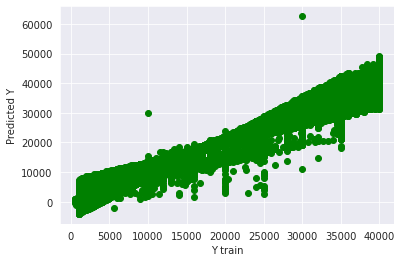

In [45]:
plt.scatter(x = y_train, y = y_pred_train, color = "green")
plt.xlabel('Y train')
plt.ylabel('Predicted Y')
plt.show()

### Evaluating The Model

#### Looking at the metrics for the train data.

* from sklearn import metrics: Imports the metrics module from scikit-learn, which provides various metrics for evaluating the performance of machine learning models.

* from sklearn.metrics import explained_variance_score: Imports the explained_variance_score function 

* from scikit-learn, which computes the explained variance regression score.

* from math import sqrt: Imports the sqrt function from the math module, which calculates the square root.

* print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train)): Prints the Mean Absolute Error (MAE) between the actual values (y_train) and predicted values (y_pred_train).

* print('MSE:', metrics.mean_squared_error(y_train, y_pred_train)): Prints the Mean Squared Error (MSE) between the actual values (y_train) and predicted values (y_pred_train).

* print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))): Prints the Root Mean Squared Error (RMSE), which is the square root of the MSE.

* print('R-squared:', explained_variance_score(y_train, y_pred_train)): Prints the R-squared (coefficient of determination) between the actual values (y_train) and predicted values (y_pred_train), which measures the proportion of variance in the dependent variable that is explained by the independent variables.

In [46]:
from sklearn import metrics
from sklearn.metrics import explained_variance_score
from math import sqrt

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))    
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))   
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))),     
print('R-squared: ',explained_variance_score(y_train, y_pred_train))

MAE: 847.8638429833588
MSE: 1721971.2271666708
RMSE: 1312.239012972359
R-squared:  0.9796212239435175


### Making Predictions

`This line of Python code uses a trained regression model (`regressor`) to make predictions on the test dataset (`X_test`). The `predict` method of the `regressor` object is called with `X_test` as the argument. The resulting predictions are stored in the variable `y_pred`, representing the predicted values of the dependent variable/target variable corresponding to the test dataset.


In [47]:
y_pred = regressor.predict(X_test)

#### Comparing the actual output values for X_test with the predicted values.

- `pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})`: This creates a DataFrame named `df1` with two columns: 'Actual' and 'Predicted'. The 'Actual' column contains the actual values stored in the variable `y_test`, while the 'Predicted' column contains the predicted values stored in the variable `y_pred`.

- `df1`: This returns or displays the DataFrame `df1`, showing the actual and predicted values side by side.

In [48]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
392949,32000.0,27905.665953
1273506,9600.0,9294.973589
324024,4000.0,4757.173943
2066630,6025.0,5857.825417
477199,25000.0,25911.088008
...,...,...
1205942,35000.0,33326.458249
860827,35000.0,34779.460899
267134,24000.0,24419.624979
867240,10000.0,10510.119486


### Evaluating The Algorithm

#### Looking at the metrics for the test data.

- `print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))`: Calculates and prints the mean absolute error (MAE) between the actual (`y_test`) and predicted (`y_pred`) values using scikit-learn's `mean_absolute_error` function.

- `print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))`: Calculates and prints the mean squared error (MSE) between the actual (`y_test`) and predicted (`y_pred`) values using scikit-learn's `mean_squared_error` function.

- `print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))`: Calculates and prints the root mean squared error (RMSE), which is the square root of the MSE. This is computed using NumPy's `sqrt` function.

- `print('R-squared:', explained_variance_score(y_test, y_pred))`: Calculates and prints the R-squared (coefficient of determination) between the actual (`y_test`) and predicted (`y_pred`) values using scikit-learn's `explained_variance_score` function. R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables.

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared: ',explained_variance_score(y_test, y_pred))

Mean Absolute Error: 845.5913775432717
Mean Squared Error: 1711299.4271931683
Root Mean Squared Error: 1308.1664371146235
R-squared:  0.9797008030847885


`R-squared (Coefficient of Determination): The R-squared value of approximately 0.98 indicates that around 98% of the variance in the dependent variable (target) is explained by the independent variables (features) in the model. This suggests that the model fits the data very well and is able to explain a large portion of the variability in the target variable.

## Plotting Actual vs Predicted Values

### Plotting The Best Fit Line


- Create a new figure and axis objects for plotting
fig, ax = plt.subplots()


- `from sklearn import datasets`: Imports the datasets module from scikit-learn, which provides various sample datasets for practice.
- `from sklearn import linear_model`: Imports the linear_model module from scikit-learn, which contains classes for linear models, including linear regression.
- `import matplotlib.pyplot as plt`: Imports the pyplot module from Matplotlib for creating visualizations.

- `fig, ax = plt.subplots()`: Creates a new figure and axis objects for plotting.
- `ax.scatter(y_test, y_pred, color='grey')`: Plots a scatter plot of actual vs. predicted loan amounts, where `y_test` represents the actual loan amounts and `y_pred` represents the predicted loan amounts. Points are plotted in grey.
- `ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, color='blue')`: Plots a diagonal line representing perfect predictions (where actual and predicted values are the same), spanning from the minimum to maximum values of both actual and predicted loan amounts. The line is dashed (`'k--'`) and colored blue.
- `ax.set_xlabel('Actual loan amount')`: Sets the x-axis label as 'Actual loan amount'.
- `ax.set_ylabel('Predicted loan amount')`: Sets the y-axis label as 'Predicted loan amount'.
- `plt.show()`: Displays the plot.

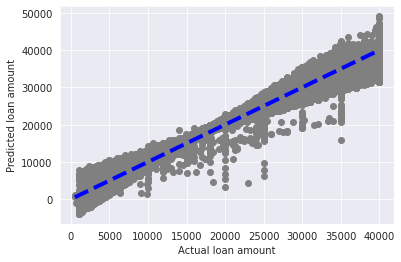

In [50]:
from sklearn import datasets
from sklearn import linear_model
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, color='grey')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4, color='blue')
ax.set_xlabel('Actual loan amount')
ax.set_ylabel('Predicted loan amount')
plt.show()

## Residuals:

#### Plotting a histogram of the residuals to check if it is normally distributed.

   - `sns.distplot`: This is a function from the Seaborn library used for visualizing the distribution of a dataset.
  - `(y_test-y_pred)`: This represents the differences between the predicted values (`y_pred`) and the actual values (`y_test`) from a machine learning model. This difference is calculated element-wise.
  - `bins = 50`: This argument specifies the number of bins to use for the histogram. Here, it's set to 50, meaning the distribution of differences will be divided into 50 bins for visualization.

- In summary, this line of code generates a histogram showing the distribution of errors between the predicted and actual values from a machine learning model. It helps to visualize how accurate the model predictions are across different ranges of errors.

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

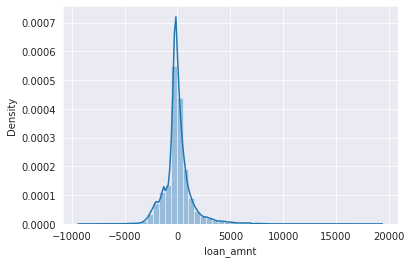

In [51]:
sns.distplot((y_test-y_pred), bins = 50)